In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1.) Munging the stock data and add two columns - MA20 and MA80

In [41]:
#import MS's stock data, add two columns - MA20 and MA80
#use dropna to remove any "Not a Number" data
MS = pd.read_csv('Microsoft_data.csv')
MS['MA20'] = MS['Close'].rolling(20).mean()
MS['MA80'] = MS['Close'].rolling(80).mean()
MS = MS.dropna()
MS.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA80
79,2015-04-27,47.230000,48.130001,47.220001,48.029999,44.621574,59248200,42.3780,43.350750
80,2015-04-28,47.779999,49.209999,47.700001,49.160000,45.671391,60730800,42.7880,43.384625
81,2015-04-29,48.720001,49.310001,48.500000,49.060001,45.578487,47804600,43.2080,43.413375
82,2015-04-30,48.700001,49.540001,48.599998,48.639999,45.188286,64725500,43.6040,43.442250
83,2015-05-01,48.580002,48.880001,48.400002,48.660000,45.206875,38937300,44.0225,43.479875


### 2. Add "Shares" column to make decisions base on the strategy

In [42]:
#Add a new column "Shares", if MA20>MA80, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

MS['Shares'] = [1 if MS.loc[ei, 'MA20']>MS.loc[ei, 'MA80'] else 0 for ei in MS.index]

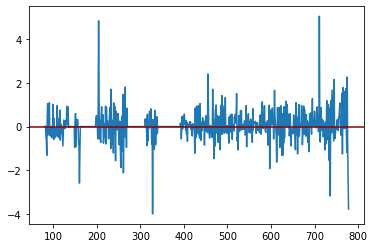

In [43]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as:
# the close price of tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

MS['Close1'] = MS['Close'].shift(-1)
MS['Profit'] = [MS.loc[ei, 'Close1'] - MS.loc[ei, 'Close'] if MS.loc[ei, 'Shares']==1 else 0 for ei in MS.index]
MS['Profit'].plot()
plt.axhline(y=0, color='#8B0000') #Dark Red (Hex Code #RRGGBB)

### 3. Use .cumsum() to display our model's performance if we follow the strategy

In [44]:
#Use .cumsum() to calculate the accumulated wealth over the period

MS['wealth'] = MS['Profit'].cumsum()
MS.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA20,MA80,Shares,Close1,Profit,wealth
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,89.8285,84.261500,1,95.010002,2.270004,31.260002
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,90.2815,84.499500,1,94.260002,-0.750000,30.510002
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,90.6770,84.727750,1,91.779999,-2.480003,28.029999
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,90.9105,84.921375,1,88.000000,-3.779999,24.250000
779,2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,90.9010,85.067750,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you Gain is 24.249999999999993')

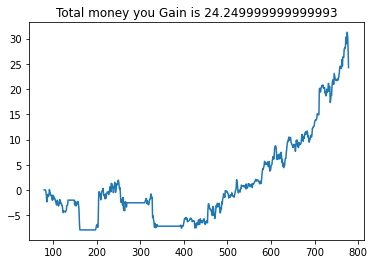

In [45]:
#plot the wealth to show the growth of profit over the period

MS['wealth'].plot()
plt.title('Total money you Gain is {}'.format(MS.loc[MS.index[-2], 'wealth']))